<a href="https://colab.research.google.com/github/brex19/Tana-Lake-Evaporation-rate-and-volume-Prediction-using-LSTM-MODEL/blob/main/Evaporation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the neccesssary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

### **Exploratory Data Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/AI

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/AI'
/content


In [ ]:
!ls

drive  sample_data


**Step 2: Read the Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/EDataset2.csv')
df.head()

**step 3: sanity check of Data**

In [ ]:
df.shape

(408, 10)

In [ ]:
# Columns name of the dataset
df.columns.tolist()

['Date',
 'T2M',
 'WS2M',
 'T2M_MAX',
 'T2M_MIN',
 'WS2M_MAX',
 'WS2M_MIN',
 'Dwn_Rad',
 'Erate',
 'Evol']

In [ ]:
#information about the data through each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      408 non-null    object 
 1   T2M       408 non-null    float64
 2   WS2M      408 non-null    float64
 3   T2M_MAX   408 non-null    float64
 4   T2M_MIN   408 non-null    float64
 5   WS2M_MAX  408 non-null    float64
 6   WS2M_MIN  408 non-null    float64
 7   Dwn_Rad   408 non-null    float64
 8   Erate     408 non-null    float64
 9   Evol      408 non-null    float64
dtypes: float64(9), object(1)
memory usage: 32.0+ KB


In [ ]:
# checking for missing values
df.isnull().sum()

Date        0
T2M         0
WS2M        0
T2M_MAX     0
T2M_MIN     0
WS2M_MAX    0
WS2M_MIN    0
Dwn_Rad     0
Erate       0
Evol        0
dtype: int64

In [ ]:
# checking for duplicated  values
df.duplicated().sum()

0

In [ ]:
df.describe()

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,21.121691,2.905441,26.771029,15.802647,6.550588,0.175539,21.926054,4.593035,425.720640
std,1.711572,0.321630,2.490751,1.626694,0.964247,0.108445,1.948518,0.617738,56.199911
min,17.510000,2.000000,21.990000,11.550000,4.080000,0.010000,16.630000,3.133073,298.530000
25%,19.937500,2.660000,24.577500,14.705000,5.827500,0.100000,20.817500,4.151982,383.160000
50%,20.730000,2.900000,26.590000,15.830000,6.625000,0.160000,21.870000,4.713277,435.490500
75%,22.437500,3.122500,28.995000,16.885000,7.242500,0.230000,23.217500,5.022304,466.455250
max,25.870000,4.210000,31.940000,20.140000,9.120000,0.880000,27.100000,6.097952,551.517000


In [ ]:
# change the data type of date Column from Object type to datetime for comparing and grouping of
# the given  parametrs in month and seasons
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date        datetime64[ns]
T2M                float64
WS2M               float64
T2M_MAX            float64
T2M_MIN            float64
WS2M_MAX           float64
WS2M_MIN           float64
Dwn_Rad            float64
Erate              float64
Evol               float64
dtype: object


<ipython-input-15-7a55894d8b08>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# calculating average Erate  for each month
grouped_df = df.groupby(df.Date.dt.month)
meann = grouped_df['Erate'].mean()
meann

Date
1     4.729422
2     4.914262
3     5.138537
4     5.334290
5     4.918649
6     4.452125
7     3.808939
8     3.491716
9     3.812792
10    4.732505
11    4.955056
12    4.828129
Name: Erate, dtype: float64

**Interpretation**

the above values are the average evaporation rate values with their corresponding month index(1 is for january, 2 is for february etc.) and below is the graphical representation of the above data

**Plot average Erate for each month**

Text(0, 0.5, 'monthly average Erate values ')

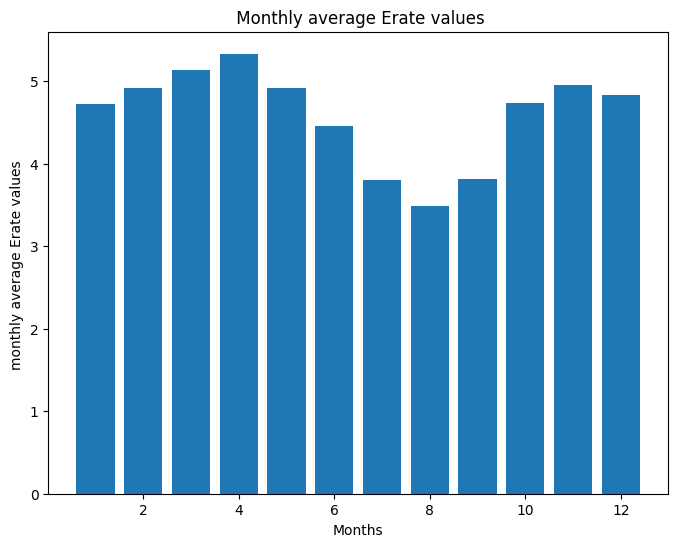

In [ ]:
plt.figure(figsize=(8, 6))
custom_index = np.arange(len(meann.values)) * 0.5
plt.bar(meann.index,meann.values)
plt.title(" Monthly average Erate values")
plt.xlabel("Months")
plt.ylabel("monthly average Erate values ")

**Observations**

the above diagram shows the average evaporation rate of each month over the years from 1985 to 2018 and we can see that february, march and april are the months with the highest evaporation rate values in thoise years

**Observation**

here is the line graph of the yearly average evaporation rate over the years from 1985 to 2018 and we can see that the evaporation rate is the highest in 2017

**Calculating Average Erate of each seasons**

In [ ]:
# Winter
target_data_winter=df[df['Date'].dt.month.isin([1, 2, 12])]
selected_columns_winter = ['Date', 'Erate']
average_Erate_winter= target_data_winter['Erate'].mean()

#spring
target_data_spring = df[df['Date'].dt.month.isin([3, 4, 5])]
selected_columns_Fall = ['Date', 'Erate']
average_Erate_Spring= target_data_spring['Erate'].mean()

#Fall
target_data_Fall=df[df['Date'].dt.month.isin([9, 10, 11])]
selected_columns_Fall = ['Date', 'Erate']
average_Erate_Fall= target_data_Fall['Erate'].mean()

#Summer
target_data_Summer=df[df['Date'].dt.month.isin([6, 7, 8])]
selected_columns_Summer = ['Date', 'Erate']
average_Erate_Summer= target_data_Summer['Erate'].mean()


here we calculated the average evaporation rate of each season to draw conclusions about the association of the season and the evaporation rate

In [ ]:
print("Fall:", average_Erate_Fall, "Summer:", average_Erate_Summer, "Winter:", average_Erate_winter, "Spring:", average_Erate_Spring)

Fall: 4.500117823529411 Summer: 3.9175935490196077 Winter: 4.82393785 Spring: 5.130492025490197


In [ ]:
grouped_df_season = df.groupby(df.Date.dt.month.map(lambda x: 'Winter' if x in [1, 2, 12] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall' if x in [9, 10, 11] else None))
meann_season = grouped_df_season['Erate'].mean()
meann_season_rad = grouped_df_season['Dwn_Rad'].mean()

<Figure size 800x600 with 0 Axes>

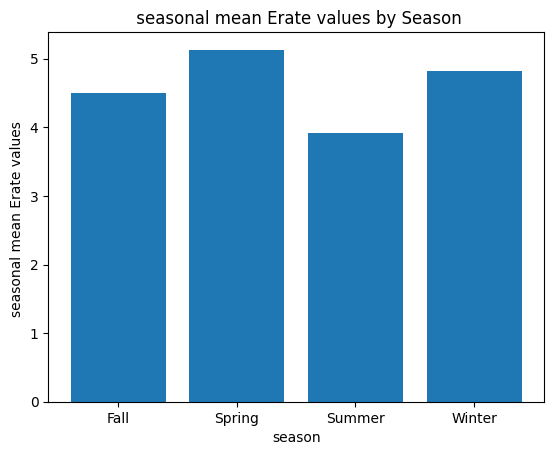

<Figure size 800x600 with 0 Axes>

In [ ]:
custom_index = np.arange(len(meann_season.values)) * 0.5
plt.bar(meann_season.index,meann_season.values)
plt.title(" seasonal mean Erate values by Season")
plt.xlabel("season")
plt.ylabel("seasonal mean Erate values ")
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

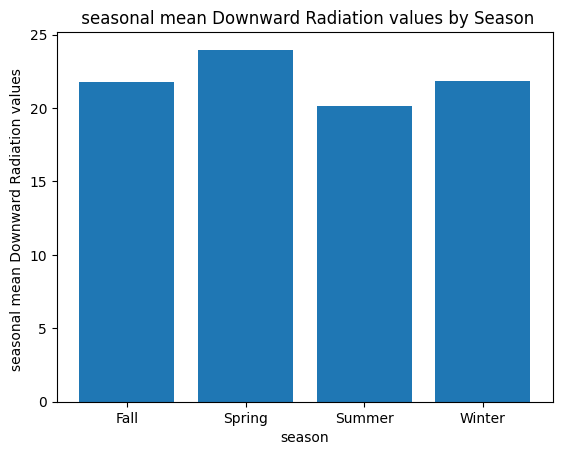

<Figure size 800x600 with 0 Axes>

In [ ]:
custom_index = np.arange(len(meann_season_rad.values)) * 0.5
plt.bar(meann_season_rad.index,meann_season_rad.values)
plt.title(" seasonal mean Downward Radiation values by Season")
plt.xlabel("season")
plt.ylabel("seasonal mean Downward Radiation values ")
plt.figure(figsize=(8, 6))

**Observation**

here from the above two figures we can see that the evaporation rate is highest on spring and winter due to the high downward radiation in the respective seasons and since downward radiation is the highly correlated factor with evaporation rate it will sgnificantly shape the evaporation rate values

In [ ]:
df_erate = df.drop(['Evol','T2M_MAX','T2M_MIN','WS2M_MIN','WS2M_MAX'], axis=1, inplace=False)
df_erate

,Date,T2M,WS2M,Dwn_Rad,Erate
0,1985-01-01,21.05,2.88,22.14,4.756807
1,1985-02-01,21.31,3.56,23.01,5.072299
2,1985-03-01,23.05,3.46,23.93,4.852545
3,1985-04-01,21.90,2.76,24.90,4.670804
4,1985-05-01,21.49,3.14,21.93,4.581093
...,...,...,...,...,...
403,2018-08-01,18.83,2.71,19.15,3.602490
404,2018-09-01,20.84,2.55,22.16,4.280815
405,2018-10-01,20.75,2.75,21.04,4.806518
406,2018-11-01,20.40,2.69,20.64,4.625378


**Correlation Analysis**

In [ ]:
df_corr_erate = df_erate.corr()['Erate'][:-1]
key_features_list_rate = df_corr_erate[abs(df_corr_erate) > 0.1].sort_values(ascending=False)
print(f"There are strongly correlated values with Erate:\n{key_features_list_rate}")

There are strongly correlated values with Erate:
Dwn_Rad    0.720288
T2M        0.688458
WS2M       0.364332
Name: Erate, dtype: float64


**Observation**

from the results we can see that the downward radiation is correlated with the evaporation rate strongly with the value of 0.720288 and the temperature takes second place in the correlation rank. the least correlated among the three parameters is the windspeed.

**Note**

the maximum and minimum temperature and wind speed values are ignored as part of the pre-processing step of removing irrelevant data. they are removed because they only show a recordings that might have happened for an instant and the monthly value of evaporation rate is determined by the average values of the temperature rather than the highest and lowest

**Correlation for Evaporation Volume**

the evaporation volume is the evaporation rate multiplied by the total time. so the evaporation volume is only dependent on the evaporation rate, other wise we are treating evaporation volume and evaporation rate as independent variables. so we calculated the correlation factor of evaporation rate for the evaporation volume to show the association as follows  

In [ ]:
df_erate_two = df.drop(['T2M','WS2M','Dwn_Rad','T2M_MAX','T2M_MIN','WS2M_MIN','WS2M_MAX'], axis=1, inplace=False)
df_corr_erate_two = df_erate_two.corr()['Evol'][:-1]
key_features_list_rate_two = df_corr_erate_two[abs(df_corr_erate_two) > 0.1].sort_values(ascending=False)
print(f"There are strongly correlated values with Erate:\n{key_features_list_rate_two}")

There are strongly correlated values with Erate:
Erate    0.976836
Name: Evol, dtype: float64


**Distribution of Temprature**

Text(0.5, 1.0, 'Histogram and KDE of Temperature')

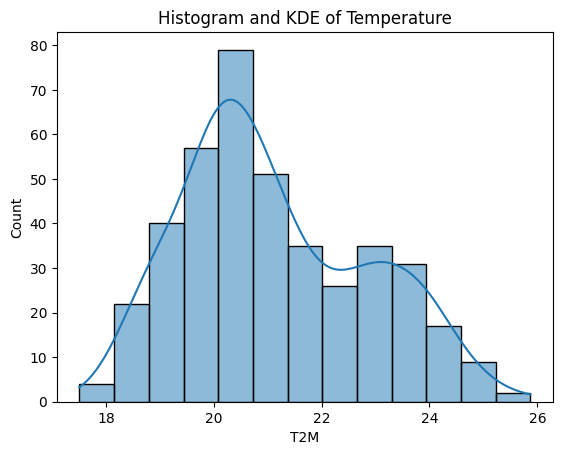

In [ ]:
df_dist = df.drop(['Evol','T2M_MAX','T2M_MIN','WS2M_MIN','WS2M_MAX'], axis=1, inplace=False)
fig, ax = plt.subplots()
sns.histplot(data=df_dist, x='T2M', kde=True)
ax.set_title("Histogram and KDE of Temperature")

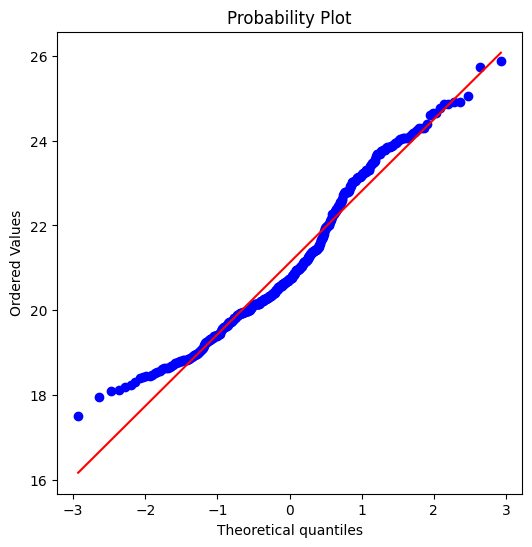

In [ ]:
# normality of Temprature
fig, (ax) = plt.subplots(figsize = (6,6))
res = stats.probplot(df_dist['T2M'],dist='norm', plot=ax)

In [ ]:
# skewness and kurtosis of Temprature
print(f"Skewness:{df_dist['T2M'].skew()}")
print(f"Kurtosis: {df_dist['T2M'].kurt()}")

Skewness:0.45326241839811476
Kurtosis: -0.6267914604221647


### **Observation**
* Many points lie out of the red straight line implying that the data is not normally distributed.
* Skewness is less than  between -0.5 and 0.5
    * it is slightly right skewwed
    * the distribution is approximately symmetric
* Kurtosis is less than 1
    * the distribution is lightly tailed
    * outliers are compromisable

**Distribution of Wind Speed**

Text(0.5, 1.0, 'Histogram and KDE of Wind Speed')

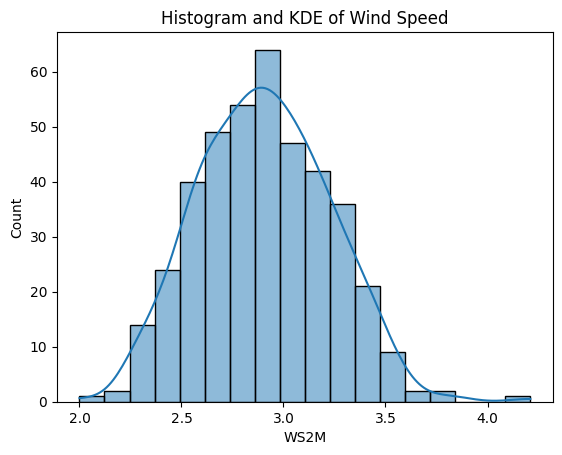

In [ ]:
df_dist = df.drop(['Evol','T2M_MAX','T2M_MIN','WS2M_MIN','WS2M_MAX'], axis=1, inplace=False)
fig, ax = plt.subplots()
sns.histplot(data=df_dist, x='WS2M', kde=True)
ax.set_title("Histogram and KDE of Wind Speed")

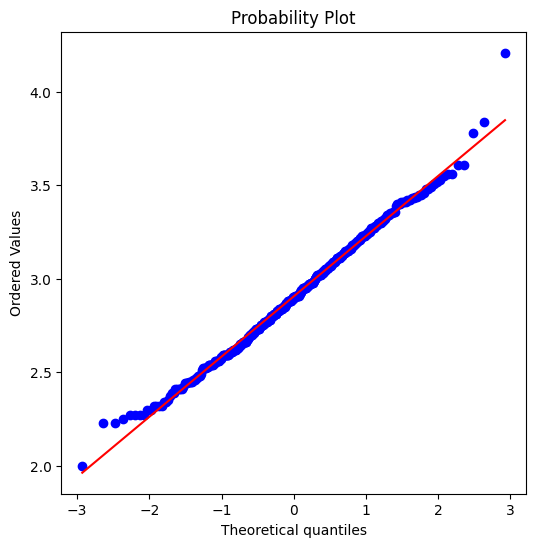

In [ ]:
# normality of Wind Speed
fig, (ax) = plt.subplots(figsize = (6,6))
res = stats.probplot(df_dist['WS2M'],dist='norm', plot=ax)

In [ ]:
# skewness and kurtosis of wind speed
print(f"Skewness:{df_dist['WS2M'].skew()}")
print(f"Kurtosis: {df_dist['WS2M'].kurt()}")

Skewness:0.21162620874830232
Kurtosis: 0.07562888820950464


### **Observation**
* Many points lie on the red straight line implying that the data is normally distributed.
* Skewness is less than between -0.5 and 0.5
    * it is slightly right skewwed
    * the distribution is approximately symmetric
* Kurtosis is less than 1
    * the distribution is lightly tailed
    * outliers are compromisable

**Distribution of Downward radiation**

Text(0.5, 1.0, 'Histogram and KDE of Downward Radiation')

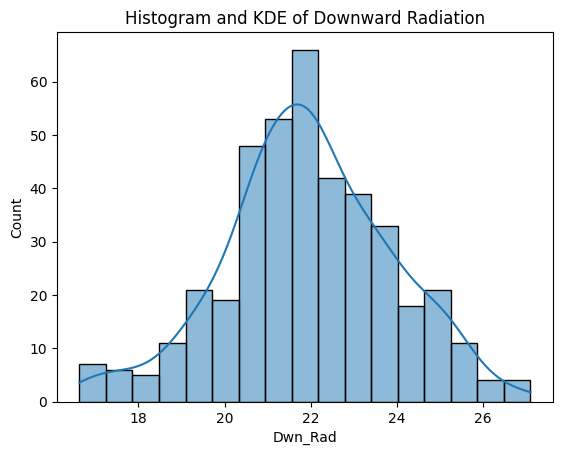

In [ ]:
df_dist = df.drop(['Evol','T2M_MAX','T2M_MIN','WS2M_MIN','WS2M_MAX'], axis=1, inplace=False)
fig, ax = plt.subplots()
sns.histplot(data=df_dist, x='Dwn_Rad', kde=True)
ax.set_title("Histogram and KDE of Downward Radiation")

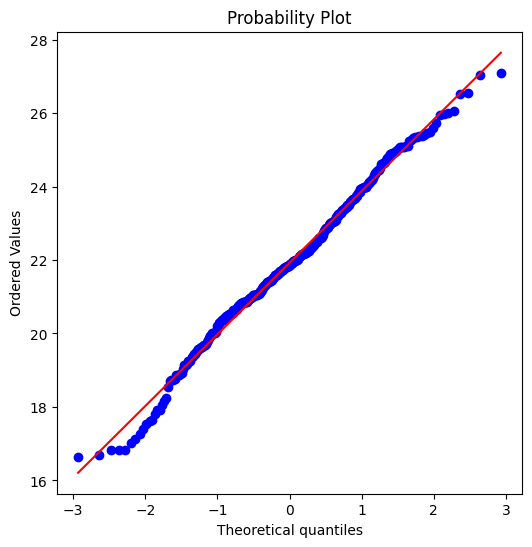

In [ ]:
# normality of Downward Radiation
fig, (ax) = plt.subplots(figsize = (6,6))
res = stats.probplot(df_dist['Dwn_Rad'],dist='norm', plot=ax)

In [ ]:
# skewness and kurtosis of Downward Radiation
print(f"Skewness:{df_dist['Dwn_Rad'].skew()}")

print(f"Kurtosis: {df_dist['Dwn_Rad'].kurt()}")

Skewness:-0.10945129304678858
Kurtosis: 0.12042219808787058


### **Observation**
* Many points lie out of the red straight line implying that the data is normally distributed.
* Skewness is less than between -0.5 and 0.5
    * it is slightly right skewwed
    * the distribution is approximately symmetric
* Kurtosis is less than 1
    * the distribution is lightly tailed
    * outliers are compromisable

In [ ]:
df.describe()

,Date,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
count,408,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,2001-12-15 23:03:31.764705920,21.121691,2.905441,26.771029,15.802647,6.550588,0.175539,21.926054,4.593035,425.720640
min,1985-01-01 00:00:00,17.510000,2.000000,21.990000,11.550000,4.080000,0.010000,16.630000,3.133073,298.530000
25%,1993-06-23 12:00:00,19.937500,2.660000,24.577500,14.705000,5.827500,0.100000,20.817500,4.151982,383.160000
50%,2001-12-16 12:00:00,20.730000,2.900000,26.590000,15.830000,6.625000,0.160000,21.870000,4.713277,435.490500
75%,2010-06-08 12:00:00,22.437500,3.122500,28.995000,16.885000,7.242500,0.230000,23.217500,5.022304,466.455250
max,2018-12-01 00:00:00,25.870000,4.210000,31.940000,20.140000,9.120000,0.880000,27.100000,6.097952,551.517000
std,NaN,1.711572,0.321630,2.490751,1.626694,0.964247,0.108445,1.948518,0.617738,56.199911


In [ ]:
to_norm = df.drop(['T2M_MAX','T2M_MIN','WS2M_MIN','WS2M_MAX'], axis=1, inplace=False)

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3 # the accepted z-score range is [-3, 3]
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std #standard scaler
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

**Z-Score for T2M**

In [ ]:
outlier_pts = detect_outliers_zscore(to_norm['T2M'])
print("Outliers from Z-scores method: ", outlier_pts)

Outliers from Z-scores method:  []


Z-Score for WS2M

In [ ]:
outlier_pts = detect_outliers_zscore(to_norm['Dwn_Rad'])
print("Outliers from Z-scores method: ", outlier_pts)

Outliers from Z-scores method:  []


Z-Score for Dwn_Rad

In [ ]:
outlier_pts = detect_outliers_zscore(to_norm['WS2M'])
print("Outliers from Z-scores method: ", outlier_pts)

Outliers from Z-scores method:  [4.21]


here we have 1 outlier on the wind speed column so we transform the data for model training efficiency and replace the value by the 99.8th percentile

In [ ]:
search_value = 3.871173
search_results = df[df['WS2M'] == search_value]
search_results
# df.loc[76, 'WS2M'] = 3.871173 this was done to replace the value 4.21 previously found on the z-score index

,Date,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol


The normalizationis done using robust scaling technique to reduce the effects of extreme values on the scaling method

In [ ]:
features =  to_norm[['T2M', 'WS2M', 'Dwn_Rad', 'Erate', 'Evol']]
scaler = RobustScaler()
normalized_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(normalized_data, columns=features.columns)
print(scaled_df)

       T2M      WS2M   Dwn_Rad     Erate      Evol
0    0.128 -0.043243  0.112500  0.050016  0.167531
1    0.232  1.427027  0.475000  0.412516 -0.037823
2    0.928  1.210811  0.858333  0.160019  0.262734
3    0.468 -0.302703  1.262500 -0.048801 -0.118404
4    0.304  0.518919  0.025000 -0.151879 -0.056288
..     ...       ...       ...       ...       ...
403 -0.760 -0.410811 -1.133333 -1.276294 -1.093298
404  0.044 -0.756757  0.120833 -0.496899 -0.467260
405  0.008 -0.324324 -0.345833  0.107134  0.285040
406 -0.132 -0.454054 -0.512500 -0.100996 -0.104934
407  0.000 -0.194595 -0.458333 -0.242177 -0.080023

[408 rows x 5 columns]


In [ ]:
scaled_df.insert(0, 'Date', value = df['Date'])

In [ ]:
scaled_df

,Date,T2M,WS2M,Dwn_Rad,Erate,Evol
0,1985-01-01,0.128,-0.043243,0.112500,0.050016,0.167531
1,1985-02-01,0.232,1.427027,0.475000,0.412516,-0.037823
2,1985-03-01,0.928,1.210811,0.858333,0.160019,0.262734
3,1985-04-01,0.468,-0.302703,1.262500,-0.048801,-0.118404
4,1985-05-01,0.304,0.518919,0.025000,-0.151879,-0.056288
...,...,...,...,...,...,...
403,2018-08-01,-0.760,-0.410811,-1.133333,-1.276294,-1.093298
404,2018-09-01,0.044,-0.756757,0.120833,-0.496899,-0.467260
405,2018-10-01,0.008,-0.324324,-0.345833,0.107134,0.285040
406,2018-11-01,-0.132,-0.454054,-0.512500,-0.100996,-0.104934


In [ ]:
scaled_df.set_index('Date', inplace=True)

In [ ]:
scaled_df

,T2M,WS2M,Dwn_Rad,Erate,Evol
Date,,,,,
1985-01-01,0.128,-0.043243,0.112500,0.050016,0.167531
1985-02-01,0.232,1.427027,0.475000,0.412516,-0.037823
1985-03-01,0.928,1.210811,0.858333,0.160019,0.262734
1985-04-01,0.468,-0.302703,1.262500,-0.048801,-0.118404
1985-05-01,0.304,0.518919,0.025000,-0.151879,-0.056288
...,...,...,...,...,...
2018-08-01,-0.760,-0.410811,-1.133333,-1.276294,-1.093298
2018-09-01,0.044,-0.756757,0.120833,-0.496899,-0.467260
2018-10-01,0.008,-0.324324,-0.345833,0.107134,0.285040


In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Colab Notebooks/AI/scaled_df1.csv')

In [ ]:
scaled_df

,T2M,WS2M,Dwn_Rad,Erate,Evol
Date,,,,,
1985-01-01,0.128,-0.043243,0.112500,0.050016,0.167531
1985-02-01,0.232,1.427027,0.475000,0.412516,-0.037823
1985-03-01,0.928,1.210811,0.858333,0.160019,0.262734
1985-04-01,0.468,-0.302703,1.262500,-0.048801,-0.118404
1985-05-01,0.304,0.518919,0.025000,-0.151879,-0.056288
...,...,...,...,...,...
2018-08-01,-0.760,-0.410811,-1.133333,-1.276294,-1.093298
2018-09-01,0.044,-0.756757,0.120833,-0.496899,-0.467260
2018-10-01,0.008,-0.324324,-0.345833,0.107134,0.285040
